# Data Analysis and Visualization Assignment 4
27.11.2023

| Name | Uni-ID |
| --- | --- |
|  |  |
|  |  |
|  |  |
|  |  |

**Group name:**

In [3]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## 1. (6.5 points) Twenty-five plots consisting of five different soil types - each replicated five times - are used to test the effect of soil type on the mean yield of asparagus [t/ha]. Decide whether the mean yields of the different soil types are all equal or not.

### 1 a. (0.5 points) Read the data file "asparagus.txt" into the R workspace.<br/> Soil code: 1: finest sand; 2: sandy soil; 3: humus sandy soil; 4: claylike sandy soil; 5: sandy clay soil. How many factors are there? How many levels are given for each factor?

In [2]:
asparagus <- read.delim("asparagus.txt")
asparagus <- data.frame(
    soil=factor(x=asparagus$soil, labels=c("finest sand",
                                           "sandy soil",
                                           "humus sandy soil",
                                           "claylike sandy soil",
                                           "sandy clay soil")),
    yield=asparagus$yield)

### 1 b. (0.5 points) Describe the variables in the data set and classify them as dependent or independent and give their scale. For experimental factors, how many levels and how many replicates for each level? Is it a balanced design?

soil type:
* independent
* fixed factor
* nominal scale
* 5 levels
* 5 replicates for each level $\rightarrow$ the design of the experiment is balanced.

yield:
* dependent
* ratio scale

### 1 c. (1 point) Describe the data by statistical parameters and visualize them in a suitable way. Discuss possible outliers.

In [3]:
summary(asparagus)
by(asparagus$yield,asparagus$soil,summary)

                  soil       yield      
 finest sand        :5   Min.   :3.200  
 sandy soil         :5   1st Qu.:3.500  
 humus sandy soil   :5   Median :3.700  
 claylike sandy soil:5   Mean   :3.716  
 sandy clay soil    :5   3rd Qu.:3.900  
                         Max.   :4.200  

asparagus$soil: finest sand
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.5     3.5     3.6     3.6     3.7     3.7 
------------------------------------------------------------ 
asparagus$soil: sandy soil
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.80    3.90    3.90    3.94    4.00    4.10 
------------------------------------------------------------ 
asparagus$soil: humus sandy soil
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.6     3.8     3.9     3.9     4.0     4.2 
------------------------------------------------------------ 
asparagus$soil: claylike sandy soil
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    3.5     3.6     3.7     3.7     3.8     3.9 
------------------------------------------------------------ 
asparagus$soil: sandy clay soil
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   3.20    3.40    3.50    3.44    3.50    3.60 

In [4]:
asparagus.colors <- hcl(h=seq(15,375,length=6), l = 65, c = 100)[1:5]
names(asparagus.colors) <- levels(asparagus$soil)

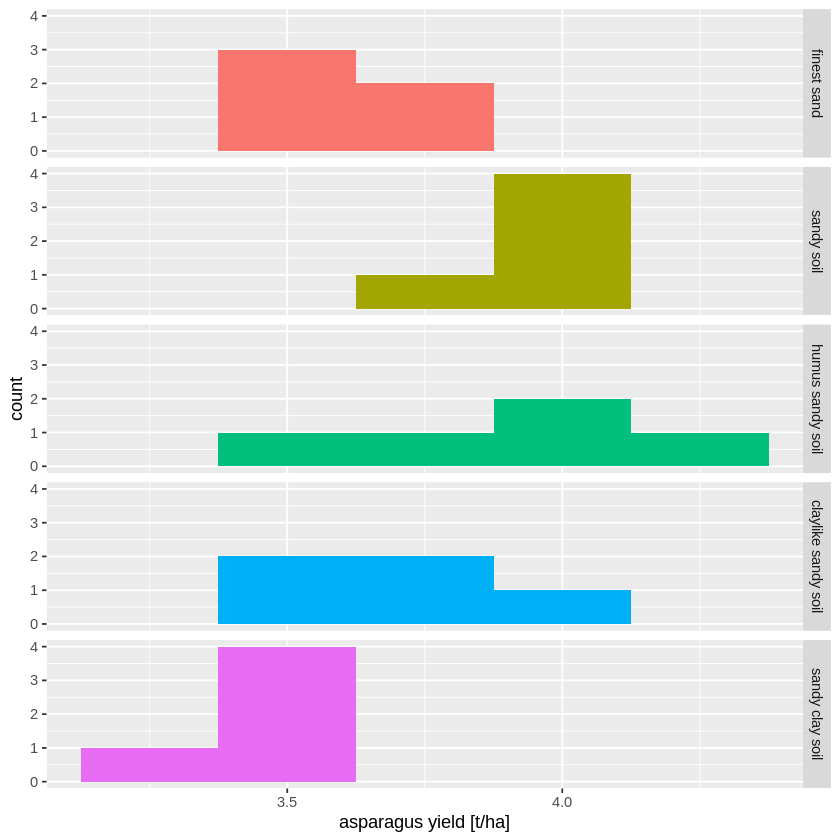

In [5]:
ggplot(data=asparagus, aes(x=yield, fill=soil)) + 
  geom_histogram(bins=5) + 
  scale_fill_manual(values=asparagus.colors) + 
  xlab("asparagus yield [t/ha]") + 
  facet_grid(asparagus$soil) +
  theme(legend.position = "none")

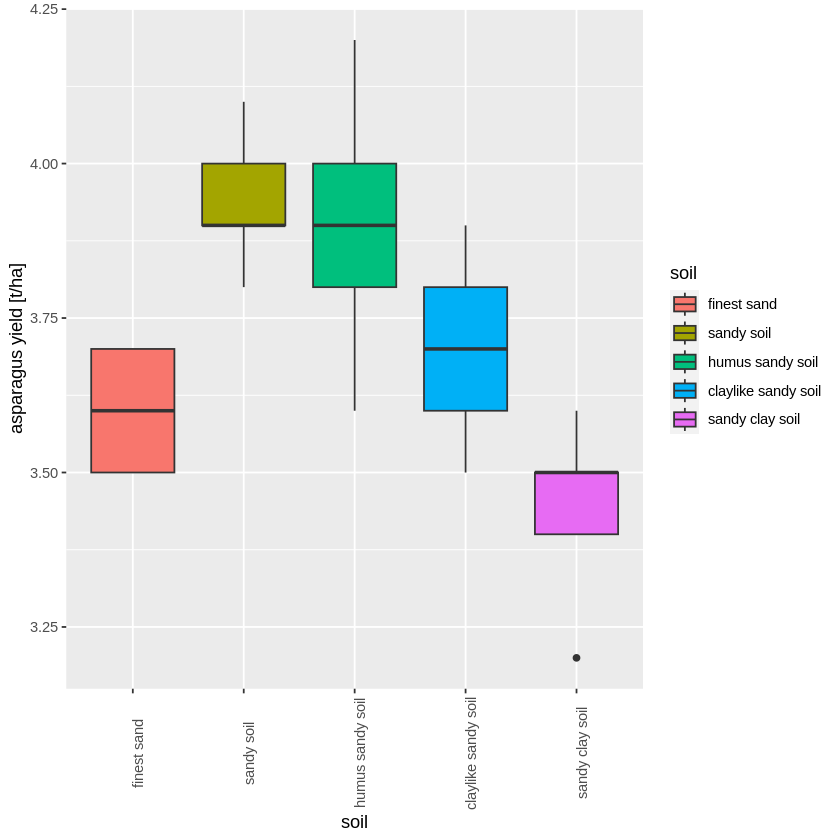

In [6]:
ggplot(data=asparagus, aes(x=soil, y=yield, fill=soil)) + 
  geom_boxplot() + 
  scale_fill_manual(values=asparagus.colors) + 
  ylab("asparagus yield [t/ha]") + 
  theme(axis.text.x = element_text(angle = 90))

Outliers:<br/>
The boxplot for "sandy clay soil" shows one outlier at a yield of about 3.2 t/ha.<br/>
By reconfiguring the x-axis limits and the number of bins, the outlier can be shown in a histogram as well:

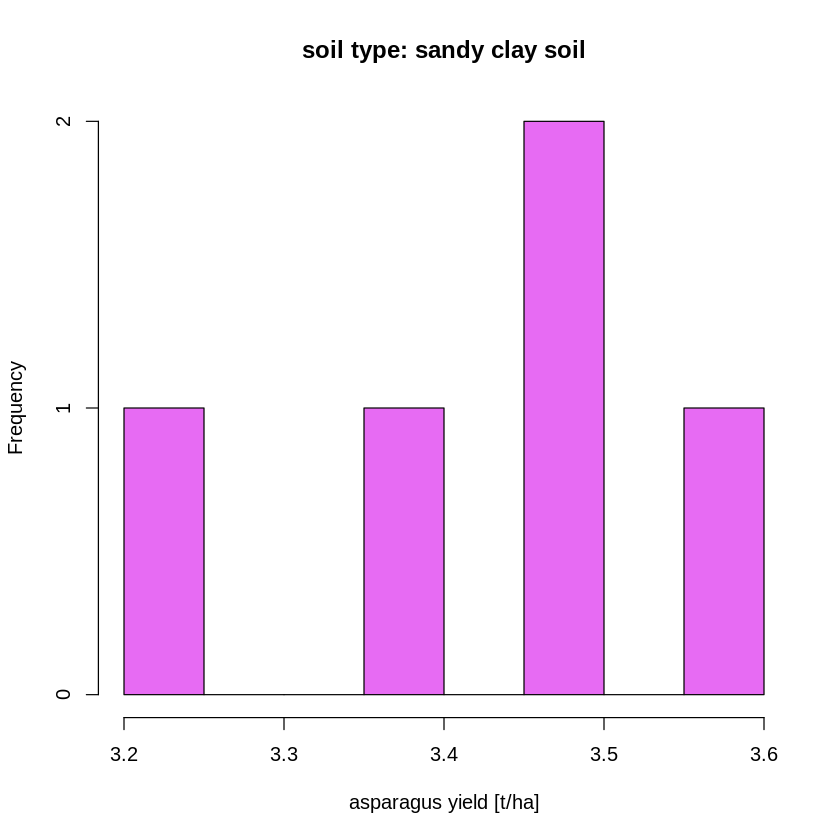

In [7]:
hist(asparagus[asparagus$soil=="sandy clay soil","yield"], 
     breaks=10, 
     xlab="asparagus yield [t/ha]", 
     main=paste("soil type: sandy clay soil"), 
     col=asparagus.colors["sandy clay soil"])

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




[1] 4 5

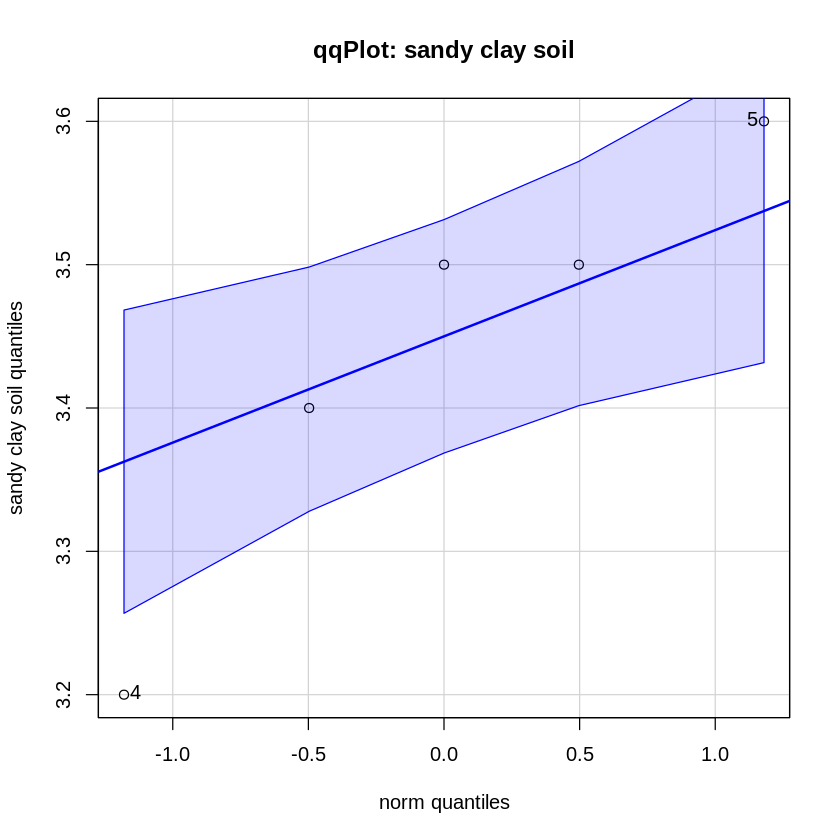

In [8]:
library(car)
qqPlot(asparagus[asparagus$soil=="sandy clay soil","yield"], 
       ylab="sandy clay soil quantiles", 
       main="qqPlot: sandy clay soil") # default: envelope=.95

The "qqPlot" function from the "car" package shows that the outlier is also outside of the 95% confidence interval enveloping the regression line of empirical normal quantiles to theoretical normal quantiles of the sandy clay soil values.<br/>
There is no known reason to exclude the outlier (different process, impossible value); the value is quite similar to the other values.<br/>
The question remains if the potential outlier leads to wrong results in subsequent analyses. To test this, ANOVA (analogous to task 1f) was performed without the outlier, yielding the same test result. The outlier thus does not influence the subsequent test. This by itself would not be a reason to exclude the outlier, but would make it necessary to treat test results with caution if a single value (outlier) changes the outcome. More data would need to be collected.

### 1 d. (1 point) Formulate the statistical hypotheses to answer the given problem.

Population means for the asparagus yield on five soil types: $\mu_{i}; i =1, \ldots ,5$.<br/>
$H_0: \mu_{1} = \mu_{2} = \mu_{3} = \mu_{4}= \mu_{5}$ <br/>
$H_A: \text{not all} \, \mu_{i}, i =1,\ldots ,5$ are equal.

### 1 e. (0.5 points) Give the right testing procedure and its assumptions.

One-way ANOVA with fixed factor (Model I).<br/>
Assumptions: The measurements are normal distributed with homogeneous variance. The samples are independent from each other.

### 1 f. (0.5 points) Run the test procedure on significance level $\alpha= 0.05$.<br/> Assume that the test-assumptions are fulfilled.

In [9]:
anova(lm(asparagus$yield~asparagus$soil))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
asparagus$soil,4,0.8696,0.2174,8.983471,0.0002536347
Residuals,20,0.4840,0.0242,NA,NA


### 1 g. (1 point) Interpret the result with respect to the given question above.

$H_0$ can be rejected and $H_A$ can be accepted. That is: The mean yields of asparagus on the five tested soil types show differences on significance level $\alpha=0.05$.

### 1 h. (1.5 points) Decide, whether a Tukey test makes sense. If yes, apply the Tukey test with $\alpha$ = 0.05 and decide which means are equal, i.e. put populations with equal means into one group.

As the null hypothesis of equal means could be rejected, a Tukey test makes sense.

In [10]:
test<-aov(lm(asparagus$yield~asparagus$soil))
TukeyHSD(test)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = lm(asparagus$yield ~ asparagus$soil))

$`asparagus$soil`
                                      diff          lwr         upr     p adj
sandy soil-finest sand                0.34  0.045589271  0.63441073 0.0187808
humus sandy soil-finest sand          0.30  0.005589271  0.59441073 0.0444899
claylike sandy soil-finest sand       0.10 -0.194410729  0.39441073 0.8448505
sandy clay soil-finest sand          -0.16 -0.454410729  0.13441073 0.4987728
humus sandy soil-sandy soil          -0.04 -0.334410729  0.25441073 0.9937865
claylike sandy soil-sandy soil       -0.24 -0.534410729  0.05441073 0.1455570
sandy clay soil-sandy soil           -0.50 -0.794410729 -0.20558927 0.0004903
claylike sandy soil-humus sandy soil -0.20 -0.494410729  0.09441073 0.2869928
sandy clay soil-humus sandy soil     -0.46 -0.754410729 -0.16558927 0.0012263
sandy clay soil-claylike sandy soil  -0.26 -0.554410729  0.03441073 

On significance level $\alpha = 0.05$ soil type 2 and 3 are different from soil type 1 and 5. All other combinations of soil types are not significantly different from another.<br/>
Based on similarity soil types can be partitioned into two groups:<br/>
{2, 3, 4};<br/> {1, 5, 4}<br/>

Using the soil code the groups are the following:<br/>
{sandy soil, humus sandy soil, claylike sandy soil};<br/> {finest sand, sandy clay soil, claylike sandy soil}<br/>
Notice the overlap of the two groups at "claylike sandy soil".<br/>

Another way of writing this is marking the soil types with the letters A and B for the first end second group respectively:<br/>
* sandy soil: A
* humus sandy soil: A
* claylike sandy soil: A \& B
* finest sand: B
* sandy clay soil: B

## 2. (6 points) Corn is to be tested for genetic subgroups of different length of corn cobs. In each of 20 randomly chosen plants from one field the length has been measured in 4 corn cobs.

### 2 a. (0.5 points) Read the data file ”corngenetics” into the R workspace. <br/> How many factors are there? How many levels are given for each factor?

In [1]:
library(readxl)
corngen <- read_excel("./corngenetics.xls")
str(corngen)

tibble [80 × 3] (S3: tbl_df/tbl/data.frame)
 $ plant  : chr [1:80] "1" "1" "1" "1" ...
 $ corncob: chr [1:80] "1" "2" "3" "4" ...
 $ length : num [1:80] 19.6 20.4 19.7 19.5 20.6 20.9 20.4 20.5 20.7 21.1 ...


In [4]:
corngen <-
corngen %>%
mutate(plant=as.factor(plant), corncob=as.factor(corncob))
str(corngen)

tibble [80 × 3] (S3: tbl_df/tbl/data.frame)
 $ plant  : Factor w/ 20 levels "1","10","11",..: 1 1 1 1 12 12 12 12 14 14 ...
 $ corncob: Factor w/ 4 levels "1","2","3","4": 1 2 3 4 1 2 3 4 1 2 ...
 $ length : num [1:80] 19.6 20.4 19.7 19.5 20.6 20.9 20.4 20.5 20.7 21.1 ...


### 2 b. (1 point) Describe the data by statistical parameters and visualize them in a suitable way. Discuss possible outliers.

In [13]:
summary(corngen)

     plant    corncob     length     
 1      : 4   1:20    Min.   :18.40  
 10     : 4   2:20    1st Qu.:19.50  
 11     : 4   3:20    Median :20.00  
 12     : 4   4:20    Mean   :20.01  
 13     : 4           3rd Qu.:20.60  
 14     : 4           Max.   :21.40  
 (Other):56                          

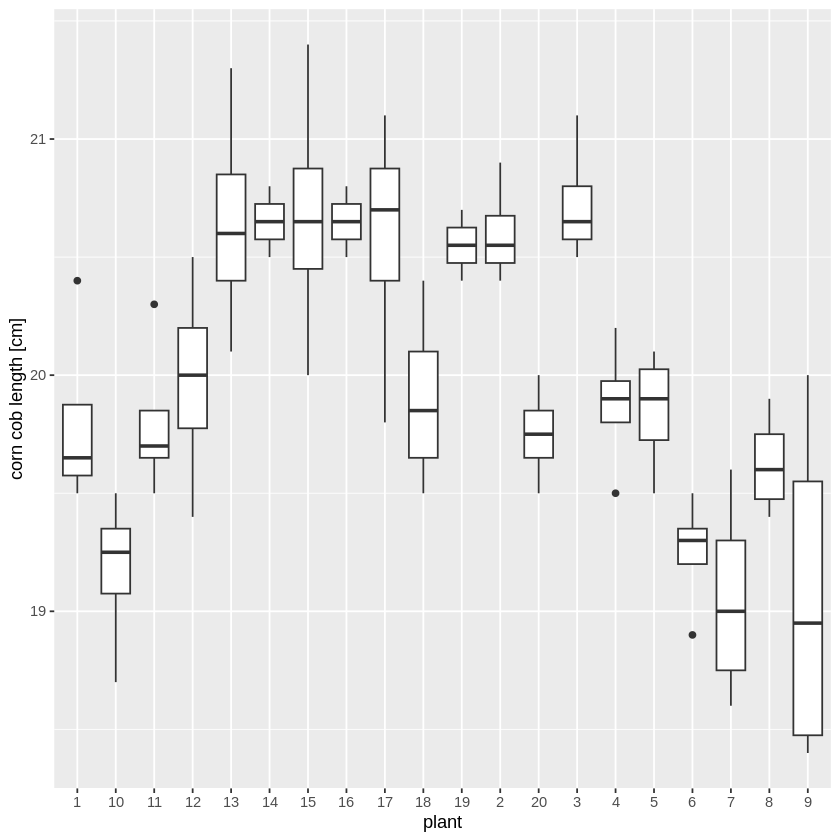

In [14]:
corngen %>%
ggplot(mapping=aes(y=length, x=plant)) +
geom_boxplot() +
ylab("corn cob length [cm]")

Four data points are usually considered insufficient for boxplots. In this case it is better to plots the measurements directly:

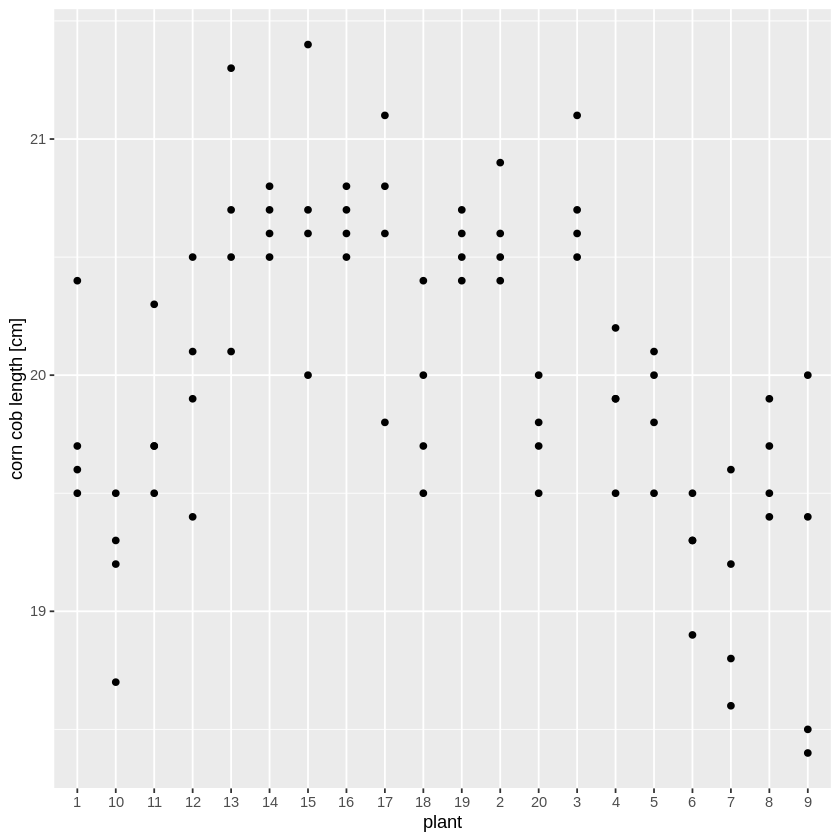

In [26]:
corngen %>%
ggplot(mapping=aes(y=length, x=plant)) +
geom_point() +
ylab("corn cob length [cm]")

We take a closer look at the measurements of the plants that show putative outliers in the boxplots: 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


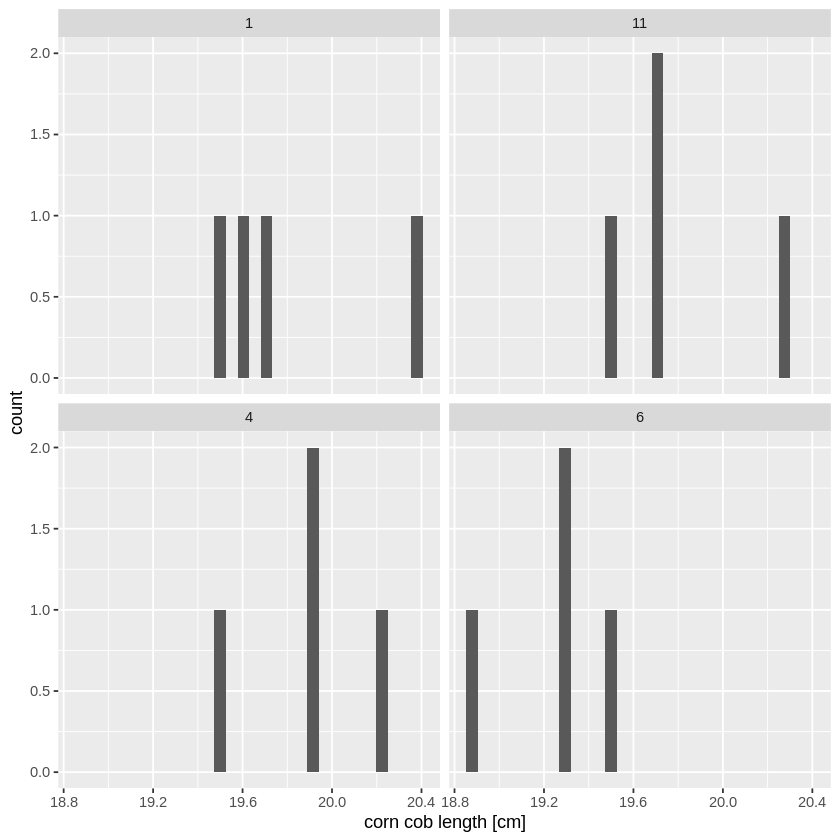

In [15]:
corngen %>%
filter(plant==1 | plant==4 | plant==6 | plant==11) %>%
ggplot(mapping=aes(x=length)) +
geom_histogram() +
facet_wrap(vars(plant)) +
xlab("corn cob length [cm]")

[1] 2 4

[1] 3 4

[1] 1 4

[1] 2 4

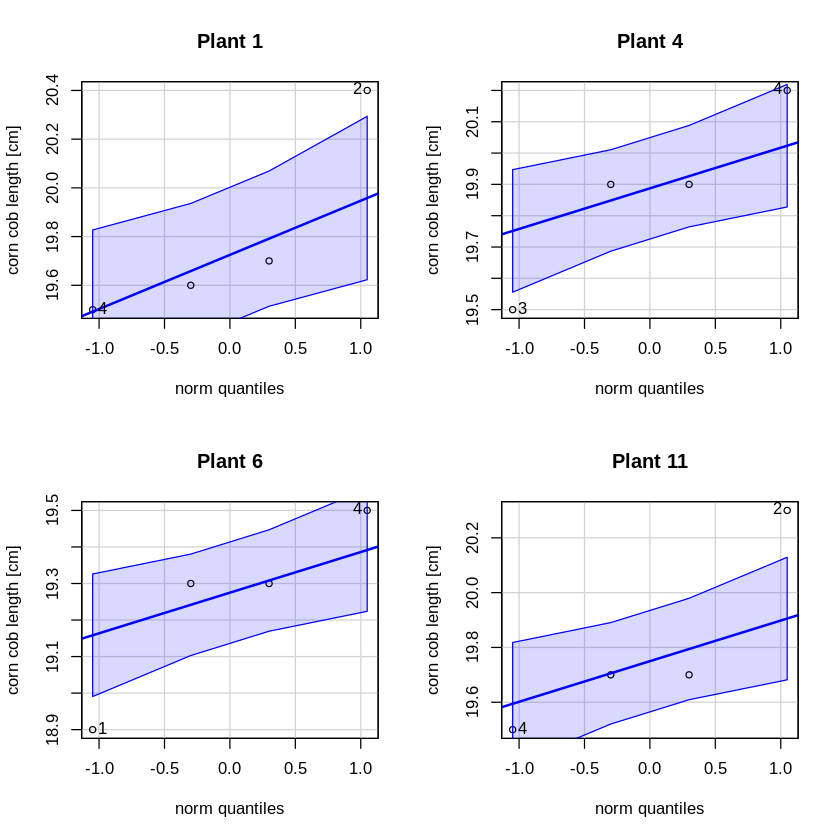

In [16]:
par(mfrow=c(2,2))
qqPlot(corngen$length[corngen$plant==1], main="Plant 1", ylab="corn cob length [cm]")
qqPlot(corngen$length[corngen$plant==4], main="Plant 4", ylab="corn cob length [cm]")
qqPlot(corngen$length[corngen$plant==6], main="Plant 6", ylab="corn cob length [cm]")
qqPlot(corngen$length[corngen$plant==11], main="Plant 11", ylab="corn cob length [cm]")

The outliers are well within the range of other measurements not very far outside of the range that is expected for normal distributed samples.</br>
Consequently, there is insufficient evidence to warrant removal of any of the outliers. 

### 2 c. (0.5 points) Is the experimental design balanced?

In [17]:
table(corngen$plant)
table(corngen$corncob)
table(paste(corngen$plant, corngen$corncob))


 1 10 11 12 13 14 15 16 17 18 19  2 20  3  4  5  6  7  8  9 
 4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4  4 


 1  2  3  4 
20 20 20 20 


 1 1  1 2  1 3  1 4 10 1 10 2 10 3 10 4 11 1 11 2 11 3 11 4 12 1 12 2 12 3 12 4 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
13 1 13 2 13 3 13 4 14 1 14 2 14 3 14 4 15 1 15 2 15 3 15 4 16 1 16 2 16 3 16 4 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
17 1 17 2 17 3 17 4 18 1 18 2 18 3 18 4 19 1 19 2 19 3 19 4  2 1  2 2  2 3  2 4 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
20 1 20 2 20 3 20 4  3 1  3 2  3 3  3 4  4 1  4 2  4 3  4 4  5 1  5 2  5 3  5 4 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
 6 1  6 2  6 3  6 4  7 1  7 2  7 3  7 4  8 1  8 2  8 3  8 4  9 1  9 2  9 3  9 4 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 

* 20 plants have been examined
* From each plant 4 cobs have been measured
* Yes, the experimental design is balanced

### 2 d. (0.5 points) Which ANOVA model would you choose to analyze the data? What are the assumptions for this model?

One-way ANOVA with random factor (Model II).<br/>
Assumptions: The measurements are normal distributed with homogeneous variance. The samples are independent from each other.

### 2 e. (1 point) Formulate the statistical hypotheses to answer the given problem.

Population means for the corn cob length of 20 different plants : $\mu_{i}; i =1, \ldots ,20$.<br/>
$H_0: \mu_{1}=\mu_{2}=\mu_{3}=\mu_{4}=\mu_{5}=\mu_{6}=\mu_{7}=\mu_{8}=\mu_{9}=\mu_{10}=\mu_{11}=\mu_{12}=\mu_{13}=\mu_{14}=\mu_{15}=\mu_{16}=\mu_{17}=\mu_{18}=\mu_{19}=\mu_{20}$ <br/>
$H_A: \text{not all} \, \mu_{i}, i =1,\ldots ,20$ are equal.

Yield variance estimation related to plant: $\sigma^2_{plant}$</br>
$H_{0}:\sigma^2_{plant} = 0;$</br>
$H_{A}:\sigma^2_{plant} \neq 0$.

### 2 f. (1 point) Compute the ANOVA on level of significance $\alpha= 0.05$.<br/> Assume that the test-assumptions are fulfilled.

In [10]:
library(lmerTest)
plant.model <- lmer(length ~ (1 | plant), data=corngen)
rand(plant.model)

,npar,logLik,AIC,LRT,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,3,-59.51124,125.0225,NA,NA,NA
(1 | plant),2,-82.14376,168.2875,45.26503,1,1.720949e-11


### 2 g. (1.5 points) Interpret the result with respect to the given question above.

$H_0$ can be rejected and $H_A$ can be accepted. That is: The mean length of cobs of the 20 tested corn plants show differences on significance level $\alpha=0.05$.

$ p = 1.7\cdot 10^{-11} < 0.05 = \alpha$</br>
$\Rightarrow$ The variance based on 'plant' is significantly different from zero on sign-level 0.05.

## 3. (7.5 points) Take another look at the data table from the long term fertilization experiment in Rengen (SupplementTableS7_CSH.xlsx). 
If the data is split up just by the fertilization levels, CSH measurements from four growths and multiple intermediate dates within these grows are grouped together. So these measurements are actually taken from many different populations. In order to proceed we need to break down the data set further.

In [19]:
library(readxl)
cmprSwrdHght <- read_excel("./SupplementTableS7_CSH.xlsx", skip=1)
cmprSwrdHght <- cmprSwrdHght %>% 
rename(CSH = `CSH [cm]`) %>% 
select(-c(`T∑`)) %>% 
rename(MeasurementNo = `Measuerment no.`)

#### 3 a. (1.5 points) Create a subset of the data set that only contains one other factor in addition to the fertilization.
Keep in mind that to achieve this, it is not enough to just delete unneeded columns. First, filter the rows to contain only the data from one level of these factors.

In [20]:
# Select last date from each growth in 2014
twentyFourteenOne <-
cmprSwrdHght %>%
filter(format(Date, "%Y")==2014) %>%
filter(Growth==1) %>%
filter(Date==max(Date))

twentyFourteenTwo <-
cmprSwrdHght %>%
filter(format(Date, "%Y")==2014) %>%
filter(Growth==2) %>%
filter(Date==max(Date))

twentyFourteenLastDate <- rbind(twentyFourteenOne, twentyFourteenTwo) %>% 
mutate(Year=format(Date, "%Y"))

#### 3 b. (1.5 point) Visualize the filtered data using a boxplot and an interaction plot. Interpret the plots in regards to the putative influence of the experimental factors on the CSH.

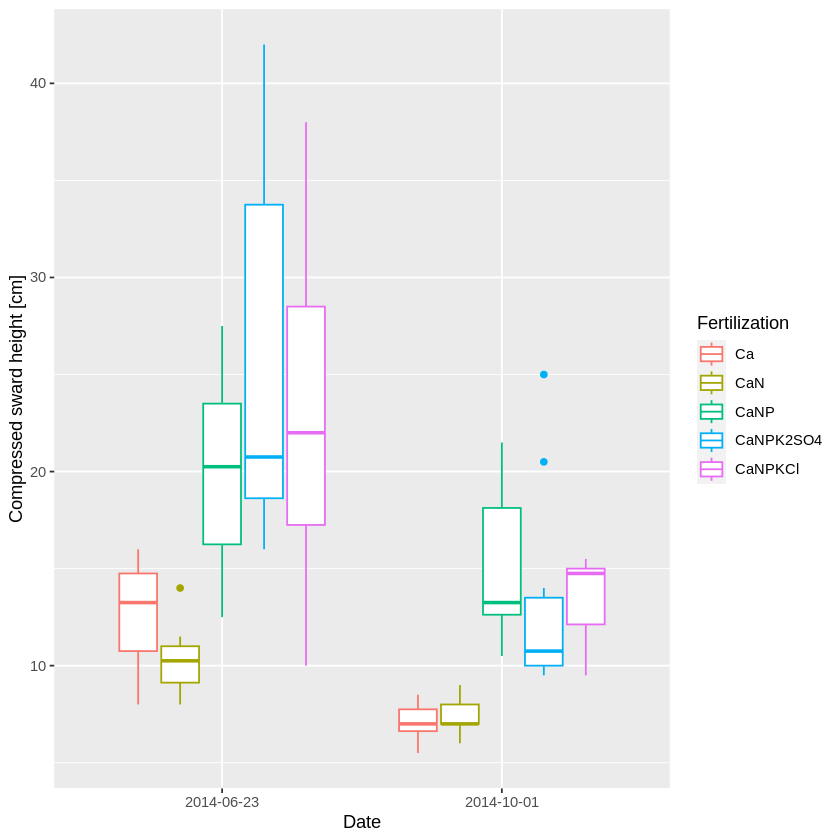

In [21]:
twentyFourteenLastDate %>%
ggplot(mapping=aes(y=CSH, x=as.factor(Date), color=Fertilization)) +
geom_boxplot() +
ylab("Compressed sward height [cm]") +
xlab("Date")

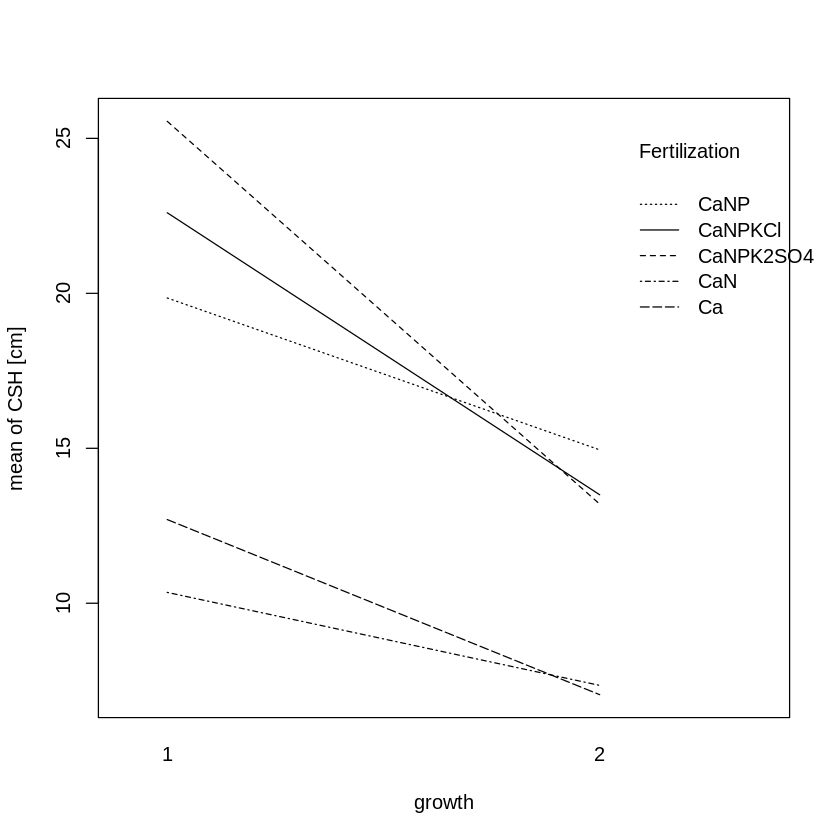

In [22]:
interaction.plot(x.factor=twentyFourteenLastDate$Growth,
                 trace.factor=twentyFourteenLastDate$Fertilization,
                 response=twentyFourteenLastDate$CSH,
                 trace.label="Fertilization",
                 ylab="mean of CSH [cm]",
                 xlab="growth")

At the end of the growing seasons in 2014:
* The CSH decreases from growth 1 to 2.</br> $\rightarrow$ There is a main effect of growth
* The CSH differs between the fertilizations </br> $\rightarrow$ There is a main effect of the fertilization.
* The CSH lines intersect, but only sightly </br> $\rightarrow$ The interaction between the effects of growth and fertilization is weak.

#### 3 c. (1 point) Test if the subsets in your filtered data are normal distributed. Discuss outliers.

In [23]:
twentyFourteenLastDate %>%
group_by(Fertilization, as.factor(Date), Growth) %>%
summarise(shapiroPval=shapiro.test(CSH)$p.value) %>%
arrange() %>%
filter(shapiroPval < 0.05)

`summarise()` has grouped output by 'Fertilization', 'as.factor(Date)'. You can
override using the `.groups` argument.


Fertilization,as.factor(Date),Growth,shapiroPval
<chr>,<fct>,<dbl>,<dbl>
CaNP,2014-10-01,2,0.033934660
CaNPK2SO4,2014-10-01,2,0.002128872
CaNPKCl,2014-10-01,2,0.006096360


[1]  8 10

[1] 1 7

[1] 9 3

[1] 10  5

[1] 10  9

[1] 2 7

[1] 9 2

[1] 9 5

[1]  2 10

[1] 3 8

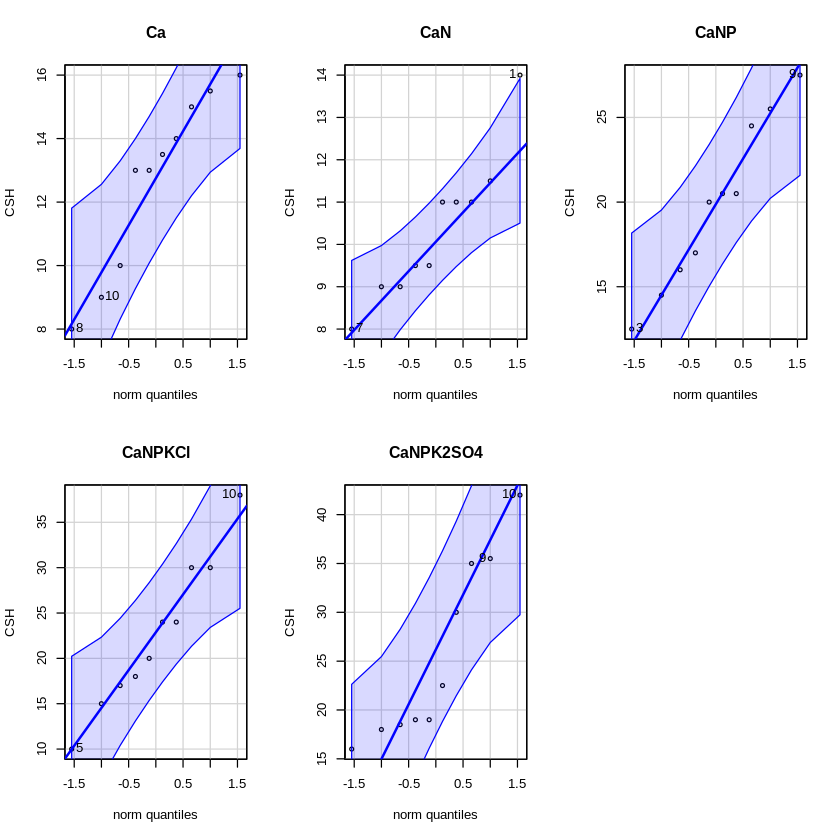

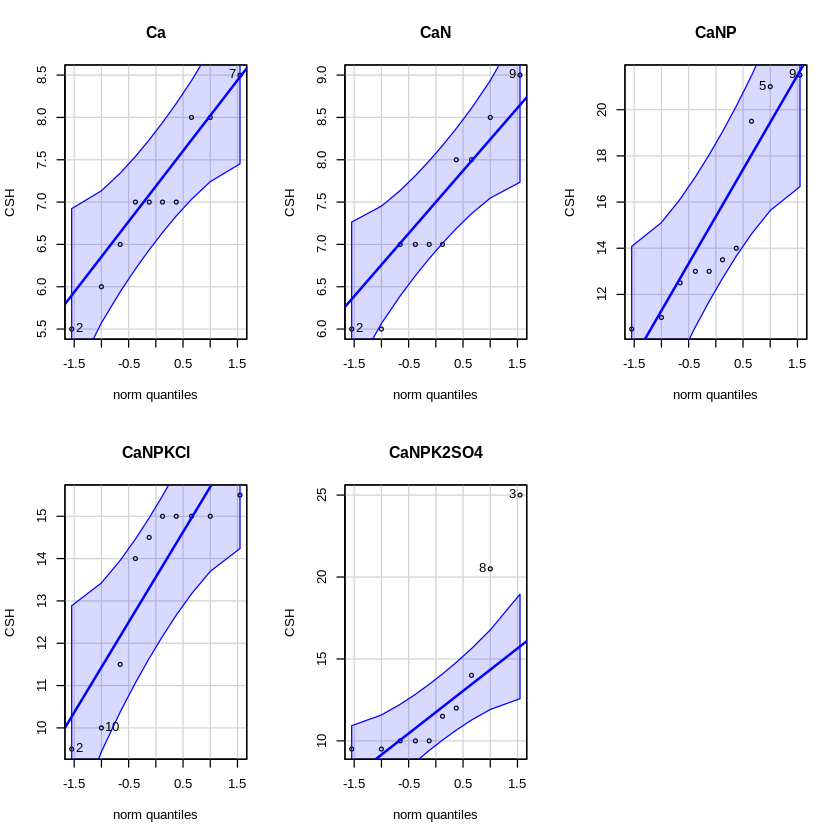

In [24]:
par(mfrow=c(2,3))
qqPlot(twentyFourteenLastDate$CSH[twentyFourteenLastDate$Fertilization=="Ca"&twentyFourteenLastDate$Growth==1], main="Ca", ylab="CSH")
qqPlot(twentyFourteenLastDate$CSH[twentyFourteenLastDate$Fertilization=="CaN"&twentyFourteenLastDate$Growth==1], main="CaN", ylab="CSH")
qqPlot(twentyFourteenLastDate$CSH[twentyFourteenLastDate$Fertilization=="CaNP"&twentyFourteenLastDate$Growth==1], main="CaNP", ylab="CSH")
qqPlot(twentyFourteenLastDate$CSH[twentyFourteenLastDate$Fertilization=="CaNPKCl"&twentyFourteenLastDate$Growth==1], main="CaNPKCl", ylab="CSH")
qqPlot(twentyFourteenLastDate$CSH[twentyFourteenLastDate$Fertilization=="CaNPK2SO4"&twentyFourteenLastDate$Growth==1], main="CaNPK2SO4", ylab="CSH")

par(mfrow=c(2,3))
qqPlot(twentyFourteenLastDate$CSH[twentyFourteenLastDate$Fertilization=="Ca"&twentyFourteenLastDate$Growth==2], main="Ca", ylab="CSH")
qqPlot(twentyFourteenLastDate$CSH[twentyFourteenLastDate$Fertilization=="CaN"&twentyFourteenLastDate$Growth==2], main="CaN", ylab="CSH")
qqPlot(twentyFourteenLastDate$CSH[twentyFourteenLastDate$Fertilization=="CaNP"&twentyFourteenLastDate$Growth==2], main="CaNP", ylab="CSH")
qqPlot(twentyFourteenLastDate$CSH[twentyFourteenLastDate$Fertilization=="CaNPKCl"&twentyFourteenLastDate$Growth==2], main="CaNPKCl", ylab="CSH")
qqPlot(twentyFourteenLastDate$CSH[twentyFourteenLastDate$Fertilization=="CaNPK2SO4"&twentyFourteenLastDate$Growth==2], main="CaNPK2SO4", ylab="CSH")

With the exception of $CaNP$, $CaNPKCl$ and $CaNPK_2SO_4$ in the second growth all data sets are normal distributed.

Outlier can be seen in the boxplots (task 3 b) for $CaN$ in growth 1 and $CaNPK_2SO_4$ in growth 2. They are well within the margins of values seen in other samples. So there are no reasons that warrant their removal.

#### 3 d. (1 point) What is the influence of the fertilization and the other factor in you filtered data on the CSH? Formulate the statistical hypotheses to answer these questions.

Three pairs of hypotheses are to be tested:
* Population means for growth levels:<br/>
    $\mu_i ;\, i=1,2$.<br/>
    $H_{10}: \mu_1=\mu_2;$<br/>
    $H_{1A}: \mu_1\neq\mu_2;$
* Population means for fertilization levels:<br/>
	$\mu_k ;\, k=1,2,3,4,5$.<br/>
	$H_{20}: \mu_1=\mu_2=\mu_3=\mu_4=\mu_5;$<br/>
	$H_{2A}: \text{at least one} \, \mu_i \, \text{is not equal to the remaining} \, \mu_j ; \, k,j = 1,2,3$.
* Interaction between growth levels and fertilization levels:<br/>
	${\gamma_{\text{(growth*fertilization)}}}_{ik}; i=1,2; \, k = 1,2,3,4,5$.<br/>
	$H_{30}: {\gamma_{\text{(growth*fertilization)}}}_{ik} = 0; i=1,2; \, k = 1,2,3,4,5. ;$<br/>
	$H_{3A}: \text{not all} \, {\gamma_{\text{(growth*fertilization)}}}_{ik} = 0; i=1,2; \, k = 1,2,3,4,5.$

#### 3 e. (1 point) Which ANOVA model would you choose to analyze your filtered data?

Two-way ANOVA for fixed factors: Model I

#### 3 f. (1.5 point) Perform the ANOVA and interpret the results. Are they in agreement with your interpretation of the interaction plot in task 2 b.?

In [25]:
anova(lm(CSH~Growth + Fertilization + Growth:Fertilization, data=twentyFourteenLastDate))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Growth,1,1225.000,1225.00000,50.48424,2.725643e-10
Fertilization,4,1957.415,489.35375,20.16706,6.946333e-12
Growth:Fertilization,4,276.325,69.08125,2.84695,2.842005e-02
Residuals,90,2183.850,24.26500,NA,NA


* Population means for growth levels:<br/>
  The null hypothesis can be rejected. That is, the means for the growth 1 and 2 are different from each other at significance level $\alpha=0.01$.
* Populations means for fertilization levels:<br/>
  The null hypothesis can be rejected. That is, at least two means for fertilization levels differ form each other at significance level $\alpha=0.01$.
* Interaction between growth levles and fertilization levels:<br/>
  The null hypothesis can **not** be rejected. That is, there is no interaction
between growth and fertilization at significance level $\alpha=0.01$.

The ANOVA results are in agreement with our interpretation of the interaction plot: Both growth and fertilization are main effects but the interaction does not play a major role.